In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [3]:
train = pd.read_csv('../input/titanic/train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Let's deal with these features and figure out which one is needed in prediction of survival
  There is no relation of survival with Name, PassengerID and Ticket these are some sort of unique Entry for every passenger so first we drop     these columns**

In [6]:
train.drop(['Name','PassengerId','Ticket'], axis =1, inplace = True)

In [7]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

AS WE SEE THERE IS HIGH NUMBER OF NULL VALUES IN CABIN COLUMNS SO WE WILL DROP THIS COLUMN INSTEAD OF USING DROPNA BECUASE BY DROPNA WE LOOSE LOTS OF DATA

In [8]:
train.drop('Cabin', axis =1, inplace = True)

In [10]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


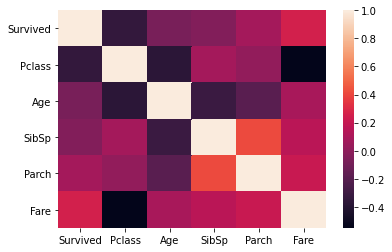

In [11]:
import seaborn as sns
sns.heatmap(train.corr())

AS WE HAVE SOME MISSING DATA IN AGE SO LETS FILL THESE WITH MEAN OF AGE COLUMNS

In [12]:
train['Age'] = train['Age'].fillna(np.mean(train['Age']))

In [13]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

we have only 2 mising in Embarked so lets drop these rows

In [14]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


**Time to visualize **

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

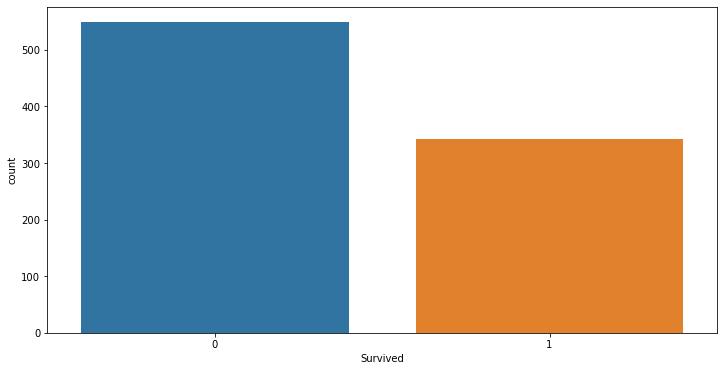

In [16]:
plt.figure(figsize = (12,6))
sns.countplot(train['Survived'])

**From this count plot we see that the number to person died is more than survived**

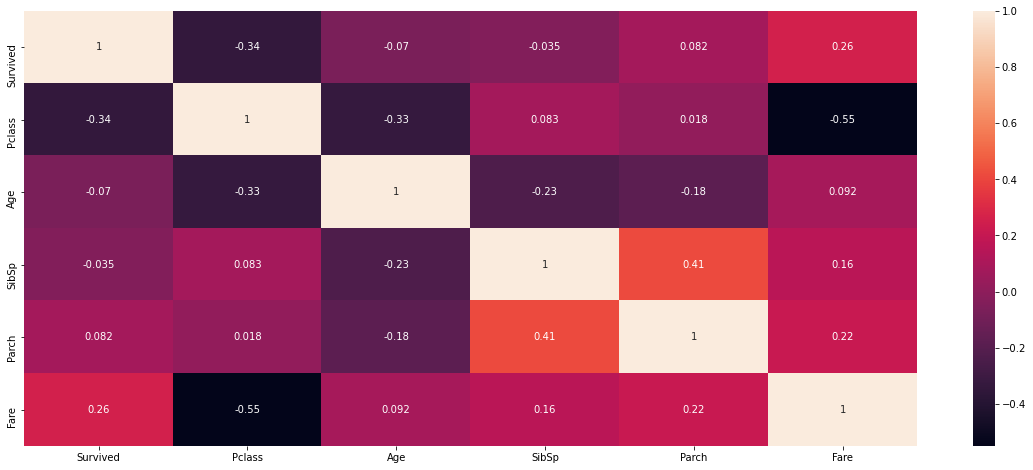

In [17]:
plt.figure(figsize = (20,8))
sns.heatmap(train.corr(), annot = True)

**Correlation is not much high in between**

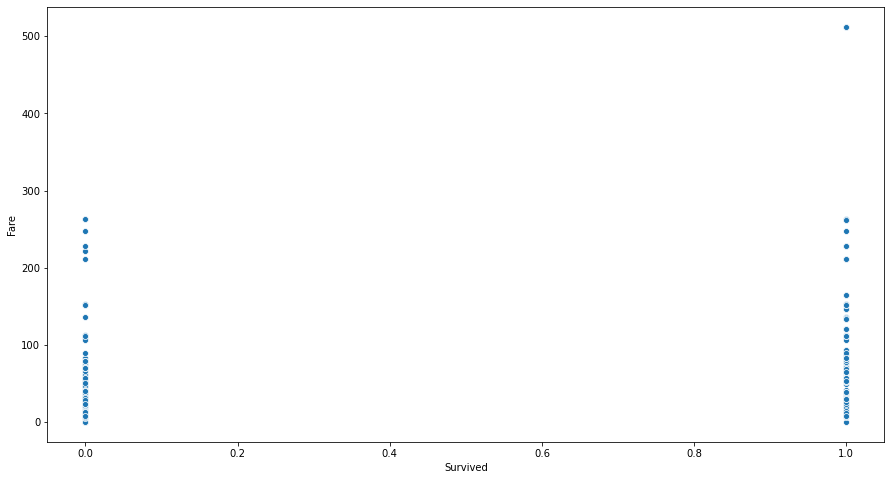

In [18]:
plt.figure(figsize = (15,8))
sns.scatterplot(train['Survived'],train['Fare'])

In [19]:
print(train['Pclass'].unique())
print(train['Embarked'].unique())

[3 1 2]
['S' 'C' 'Q' nan]


Lets go for categorical columns

In [20]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)
p = pd.get_dummies(train['Pclass'], drop_first = True)

In [21]:
train = pd.concat([sex,train,embark,p], axis =1)

In [22]:
train.drop(['Pclass','Sex','Embarked'], axis =1, inplace = True)

Now we all set for training our model

I am using Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
x = train.drop('Survived', axis =1)
y = train['Survived']

In [25]:
model = LogisticRegression()

In [26]:
model.fit(x,y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [27]:
test = pd.read_csv('../input/titanic/test.csv')
test_x = pd.read_csv('../input/titanic/test.csv')

In [28]:
test['Age'] = test['Age'].fillna(np.mean(test['Age']))

In [29]:
test['Fare'] = test['Fare'].fillna(np.mean(test['Fare']))

In [30]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [31]:
sex_t = pd.get_dummies(test['Sex'], drop_first = True)
embark_t = pd.get_dummies(test['Embarked'], drop_first = True)
p_t = pd.get_dummies(test['Pclass'], drop_first = True)

In [32]:
test = pd.concat([sex_t,test,embark_t,p_t], axis =1)

In [33]:
test.drop(['PassengerId','Name','Sex','Pclass','Ticket','Embarked','Cabin'], axis =1, inplace = True)

In [34]:
test

,male,Age,SibSp,Parch,Fare,Q,S,2,3
0,1,34.50000,0,0,7.8292,1,0,0,1
1,0,47.00000,1,0,7.0000,0,1,0,1
2,1,62.00000,0,0,9.6875,1,0,1,0
3,1,27.00000,0,0,8.6625,0,1,0,1
4,0,22.00000,1,1,12.2875,0,1,0,1
...,...,...,...,...,...,...,...,...,...
413,1,30.27259,0,0,8.0500,0,1,0,1
414,0,39.00000,0,0,108.9000,0,0,0,0
415,1,38.50000,0,0,7.2500,0,1,0,1
416,1,30.27259,0,0,8.0500,0,1,0,1


In [35]:
prediction = model.predict(test)

In [ ]:
output = pd.DataFrame({'PassengerId' : test_x.PassengerId, 'Survived':prediction})
output.to_csv('Submission.csv', index = False)
output.head()

for Logistic Regression i got 16k rank so used Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier()

In [54]:
n_estimators = [int(x) for x in np.linspace(20,400,num = 20)]
max_depth = [int(x) for x in np.linspace(1,100,num = 10)]
min_samples_split = [2,3,5,7,8]
min_samples_leaf = [2,3,5,8]
bootstrap = [True,False]

In [55]:
random_para = {'n_estimators' : n_estimators,
               'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf,
                'bootstrap' : bootstrap}

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
random = RandomizedSearchCV(estimator = rf, param_distributions = random_para, cv = 3, n_iter = 100, verbose = 5)

In [58]:
random.fit(x,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=160, min_samples_split=3, min_samples_leaf=2, max_depth=56, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=160, min_samples_split=3, min_samples_leaf=2, max_depth=56, bootstrap=False, score=0.788, total=   0.3s
[CV] n_estimators=160, min_samples_split=3, min_samples_leaf=2, max_depth=56, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=160, min_samples_split=3, min_samples_leaf=2, max_depth=56, bootstrap=False, score=0.825, total=   0.3s
[CV] n_estimators=160, min_samples_split=3, min_samples_leaf=2, max_depth=56, bootstrap=False 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=160, min_samples_split=3, min_samples_leaf=2, max_depth=56, bootstrap=False, score=0.818, total=   0.3s
[CV] n_estimators=80, min_samples_split=8, min_samples_leaf=8, max_depth=23, bootstrap=False 
[CV]  n_estimators=80, min_samples_split=8, min_samples_leaf=8, max_depth=23, bootstrap=False, score=0.788, total=   0.1s
[CV] n_estimators=80, min_samples_split=8, min_samples_leaf=8, max_depth=23, bootstrap=False 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=80, min_samples_split=8, min_samples_leaf=8, max_depth=23, bootstrap=False, score=0.852, total=   0.1s
[CV] n_estimators=80, min_samples_split=8, min_samples_leaf=8, max_depth=23, bootstrap=False 
[CV]  n_estimators=80, min_samples_split=8, min_samples_leaf=8, max_depth=23, bootstrap=False, score=0.818, total=   0.1s
[CV] n_estimators=40, min_samples_split=8, min_samples_leaf=5, max_depth=34, bootstrap=False 
[CV]  n_estimators=40, min_samples_split=8, min_samples_leaf=5, max_depth=34, bootstrap=False, score=0.801, total=   0.1s
[CV] n_estimators=40, min_samples_split=8, min_samples_leaf=5, max_depth=34, bootstrap=False 
[CV]  n_estimators=40, min_samples_split=8, min_samples_leaf=5, max_depth=34, bootstrap=False, score=0.838, total=   0.1s
[CV] n_estimators=40, min_samples_split=8, min_samples_leaf=5, max_depth=34, bootstrap=False 
[CV]  n_estimators=40, min_samples_split=8, min_samples_leaf=5, max_depth=34, bootstrap=False, score=0.822, total=   0.1s
[CV] n_estimat

[CV]  n_estimators=140, min_samples_split=8, min_samples_leaf=5, max_depth=23, bootstrap=True, score=0.805, total=   0.3s
[CV] n_estimators=140, min_samples_split=8, min_samples_leaf=5, max_depth=23, bootstrap=True 
[CV]  n_estimators=140, min_samples_split=8, min_samples_leaf=5, max_depth=23, bootstrap=True, score=0.838, total=   0.3s
[CV] n_estimators=140, min_samples_split=8, min_samples_leaf=5, max_depth=23, bootstrap=True 
[CV]  n_estimators=140, min_samples_split=8, min_samples_leaf=5, max_depth=23, bootstrap=True, score=0.815, total=   0.3s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_depth=56, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_depth=56, bootstrap=False, score=0.791, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_depth=56, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_depth=56, bootstrap=False, score=0.835, total=   0.2s
[CV] n_est

[CV]  n_estimators=120, min_samples_split=2, min_samples_leaf=5, max_depth=34, bootstrap=True, score=0.798, total=   0.2s
[CV] n_estimators=120, min_samples_split=2, min_samples_leaf=5, max_depth=34, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=2, min_samples_leaf=5, max_depth=34, bootstrap=True, score=0.845, total=   0.2s
[CV] n_estimators=120, min_samples_split=2, min_samples_leaf=5, max_depth=34, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=2, min_samples_leaf=5, max_depth=34, bootstrap=True, score=0.818, total=   0.2s
[CV] n_estimators=120, min_samples_split=2, min_samples_leaf=5, max_depth=56, bootstrap=False 
[CV]  n_estimators=120, min_samples_split=2, min_samples_leaf=5, max_depth=56, bootstrap=False, score=0.791, total=   0.2s
[CV] n_estimators=120, min_samples_split=2, min_samples_leaf=5, max_depth=56, bootstrap=False 
[CV]  n_estimators=120, min_samples_split=2, min_samples_leaf=5, max_depth=56, bootstrap=False, score=0.852, total=   0.2s
[CV] n_est

[CV]  n_estimators=340, min_samples_split=5, min_samples_leaf=2, max_depth=45, bootstrap=True, score=0.832, total=   0.6s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=2, max_depth=100, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=2, max_depth=100, bootstrap=False, score=0.805, total=   0.2s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=2, max_depth=100, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=2, max_depth=100, bootstrap=False, score=0.835, total=   0.2s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=2, max_depth=100, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=2, max_depth=100, bootstrap=False, score=0.835, total=   0.2s
[CV] n_estimators=120, min_samples_split=5, min_samples_leaf=2, max_depth=56, bootstrap=False 
[CV]  n_estimators=120, min_samples_split=5, min_samples_leaf=2, max_depth=56, bootstrap=False, score=0.791, total=   0.2s


[CV]  n_estimators=340, min_samples_split=2, min_samples_leaf=5, max_depth=1, bootstrap=True, score=0.754, total=   0.5s
[CV] n_estimators=340, min_samples_split=2, min_samples_leaf=5, max_depth=1, bootstrap=True 
[CV]  n_estimators=340, min_samples_split=2, min_samples_leaf=5, max_depth=1, bootstrap=True, score=0.808, total=   0.5s
[CV] n_estimators=340, min_samples_split=2, min_samples_leaf=5, max_depth=1, bootstrap=True 
[CV]  n_estimators=340, min_samples_split=2, min_samples_leaf=5, max_depth=1, bootstrap=True, score=0.761, total=   0.5s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=2, max_depth=67, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=2, max_depth=67, bootstrap=False, score=0.798, total=   0.5s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=2, max_depth=67, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=2, max_depth=67, bootstrap=False, score=0.832, total=   0.5s
[CV] n_estimato

[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=5, max_depth=89, bootstrap=False, score=0.825, total=   0.3s
[CV] n_estimators=360, min_samples_split=2, min_samples_leaf=2, max_depth=78, bootstrap=True 
[CV]  n_estimators=360, min_samples_split=2, min_samples_leaf=2, max_depth=78, bootstrap=True, score=0.798, total=   0.7s
[CV] n_estimators=360, min_samples_split=2, min_samples_leaf=2, max_depth=78, bootstrap=True 
[CV]  n_estimators=360, min_samples_split=2, min_samples_leaf=2, max_depth=78, bootstrap=True, score=0.845, total=   0.7s
[CV] n_estimators=360, min_samples_split=2, min_samples_leaf=2, max_depth=78, bootstrap=True 
[CV]  n_estimators=360, min_samples_split=2, min_samples_leaf=2, max_depth=78, bootstrap=True, score=0.825, total=   0.7s
[CV] n_estimators=140, min_samples_split=3, min_samples_leaf=2, max_depth=100, bootstrap=True 
[CV]  n_estimators=140, min_samples_split=3, min_samples_leaf=2, max_depth=100, bootstrap=True, score=0.795, total=   0.3s
[CV] n_esti

[CV]  n_estimators=340, min_samples_split=7, min_samples_leaf=3, max_depth=100, bootstrap=False, score=0.835, total=   0.6s
[CV] n_estimators=340, min_samples_split=7, min_samples_leaf=3, max_depth=100, bootstrap=False 
[CV]  n_estimators=340, min_samples_split=7, min_samples_leaf=3, max_depth=100, bootstrap=False, score=0.838, total=   0.6s
[CV] n_estimators=60, min_samples_split=3, min_samples_leaf=5, max_depth=56, bootstrap=True 
[CV]  n_estimators=60, min_samples_split=3, min_samples_leaf=5, max_depth=56, bootstrap=True, score=0.801, total=   0.1s
[CV] n_estimators=60, min_samples_split=3, min_samples_leaf=5, max_depth=56, bootstrap=True 
[CV]  n_estimators=60, min_samples_split=3, min_samples_leaf=5, max_depth=56, bootstrap=True, score=0.828, total=   0.1s
[CV] n_estimators=60, min_samples_split=3, min_samples_leaf=5, max_depth=56, bootstrap=True 
[CV]  n_estimators=60, min_samples_split=3, min_samples_leaf=5, max_depth=56, bootstrap=True, score=0.828, total=   0.2s
[CV] n_estimat

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=8, max_depth=56, bootstrap=False, score=0.798, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=8, max_depth=56, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=8, max_depth=56, bootstrap=False, score=0.852, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=8, max_depth=56, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=8, max_depth=56, bootstrap=False, score=0.822, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=12, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=12, bootstrap=False, score=0.798, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=12, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_depth=12, bootstrap=False, score=0.845, total=   0.3s
[CV] 

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 12, 23, 34, 45, 56, 67,
                                                      78, 89, 100],
                                        'min_samples_leaf': [2, 3, 5, 8],
                                        'min_samples_split': [2, 3, 5, 7, 8],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
                                                         200, 220, 240, 260,
                                                         280, 300, 320, 340,
                                                         360, 380, 400]},
                   verbose=5)

In [59]:
random.best_estimator_

RandomForestClassifier(max_depth=34, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=200)

In [60]:
rf = RandomForestClassifier(max_depth=34, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=200)

In [61]:
rf.fit(x,y)

RandomForestClassifier(max_depth=34, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=200)

In [62]:
prediction1 = rf.predict(test)

In [63]:
output = pd.DataFrame({'PassengerId' : test_x.PassengerId, 'Survived':prediction1})
output.to_csv('Submission.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
